In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('suicidal_test.csv')
df1 = pd.read_csv('prodigal_test.csv')
df2 = pd.read_csv('greedy_test.csv')


df2.head()
#df2.sort_values('True', ascending=False).head(n=20)


,address,is_greedy
0,0x84d50ebf4737331fb41ff9e3c6c324262c5b661c,True
1,0xd7a27d8d58f0c9e378fb3cb2816bde94c5e34059,False
2,0x0373bd549897b97bfdc17e9be3f576eb03916857,False
3,0x22CdaA7B4460A046F0Cc9878A4f79fDC2f187316,False
4,0xcd6608b1291d4307652592c29bff7d51f1ad83d7,True


In [3]:
#df2['True'] = (df2['True'] == 'True').astype(int)
#test = df2[df2['True'] == 'True']
df['False'].describe()

count     16602
unique        1
top       False
freq      16602
Name: False, dtype: object

In [4]:
df1['False'].describe()

count     16568
unique        1
top       False
freq      16568
Name: False, dtype: object

In [5]:
df2['True'].describe()

count     16568
unique        2
top       False
freq      14701
Name: True, dtype: object

In [6]:
df['False'] = df['False'].astype(str)
df1['False'] = df1['False'].astype(str)
df2['True'] = df2['True'].astype(str)
print(df[df['False'] == 'True'].count())
print(df1[df1['False'] == 'True'].count())
print(df2[df2['True'] == 'True'].count())


0x84d50ebf4737331fb41ff9e3c6c324262c5b661c    0
False                                         0
dtype: int64
0x84d50ebf4737331fb41ff9e3c6c324262c5b661c    0
False                                         0
dtype: int64
0x84d50ebf4737331fb41ff9e3c6c324262c5b661c    1867
True                                          1867
dtype: int64


In [7]:
df_greedy = pd.read_csv('greedy_test.csv')
df_greedy.count()

address      16569
is_greedy    16569
dtype: int64

In [4]:
df_contract = pd.read_csv('~/github/contract_info_1.csv')

In [5]:
df_contract.head()

,address,compiler,contract_name,tx_count,date_verified
0,0x69851da8433dbe95e8bc4bda265651f250b74c21,v0.4.20,HumanStandardToken,1,3/5/2018
1,0xfc772f75b8147586c7d6d47d7743c80122fa0f53,v0.4.20,CrypexToken,1,3/5/2018
2,0x286249c8374057d9647a7f4ac12211071ceb1cae,v0.4.20,EVT,1,3/5/2018
3,0x0d4be1e3a27aeae34d289d7fa47c612606d6420f,v0.4.20,EVM,1,3/5/2018
4,0x4d322246fb48b3222b5f421f7bf158cb952c71d9,v0.4.18,BitrustToken,1,3/5/2018


/home/zchao/anaconda3/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


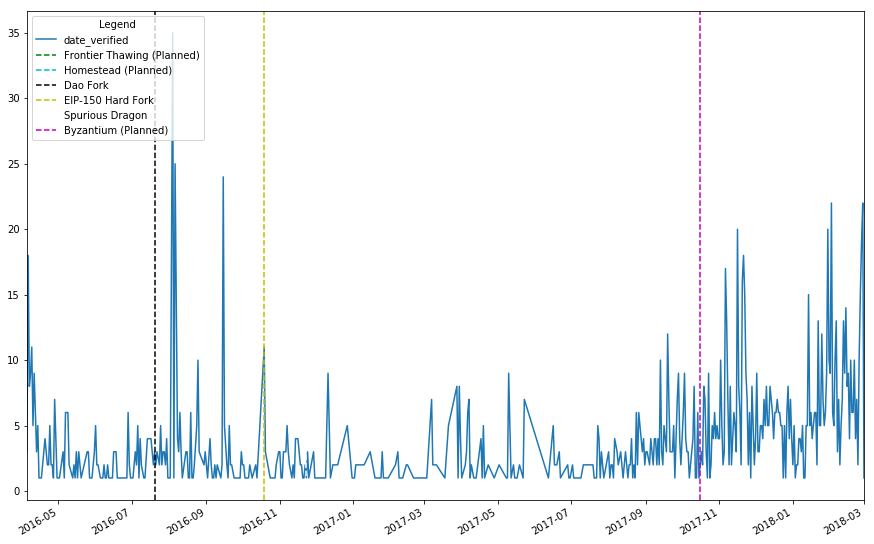

In [8]:
result = pd.merge(df_contract, df_greedy, on='address')
result['is_greedy'] = result['is_greedy'].astype(str)
result['date_verified'] = result['date_verified'].astype(str)
result[result['is_greedy'] == 'True']
greedy = result[result['is_greedy'] == 'True']
greedy['date_verified'] = pd.to_datetime(greedy['date_verified'])
greedy.sort_values(by='date_verified')
greedy.count()
#greedy.plot(x='date_verified', y='tx_count', figsize=(50, 30))
plot = pd.value_counts(greedy['date_verified']).plot(figsize=(15, 10))
hard_forks = [1441661589, 1457981393, 1469020840, 1476796771, 1479831344, 1508131331]
fork_names = ['Frontier Thawing (Planned)', 'Homestead (Planned)', 'Dao Fork', 'EIP-150 Hard Fork', 'Spurious Dragon', 'Byzantium (Planned)']
line_format = ['g', 'c', 'k', 'y', 'w', 'm']
i = 0
for z in hard_forks:
    xc = pd.to_datetime(z, unit="s")
    plt.axvline(x=xc, linestyle='--', color=line_format[i], label=fork_names[i])
    i += 1

plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
    ncol=1, shadow=False, title="Legend", fancybox=True)
# fig = plot.get_figure()
# fig.savefig('greedy.png')
plt.show()



# plot = greedy.plot(x='date_verified', y='tx_count', figsize=(50, 30))
# fig = plot.get_figure()
# fig.savefig('ether_tx_date.png')

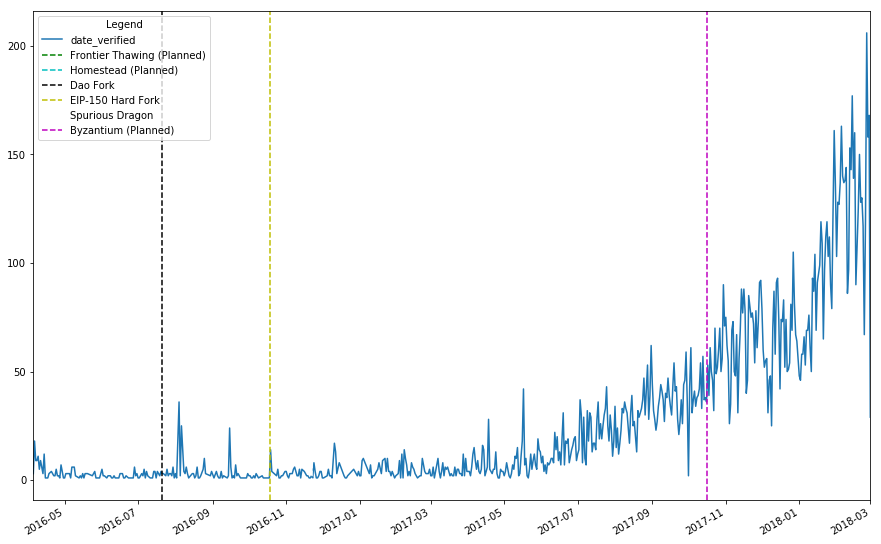

In [9]:
result = pd.merge(df_contract, df_greedy, on='address')
result['is_greedy'] = result['is_greedy'].astype(str)
result['date_verified'] = result['date_verified'].astype(str)

result.count()
result['date_verified'] = pd.to_datetime(result['date_verified'])
result.sort_values(by='date_verified')
plot = pd.value_counts(result['date_verified']).plot(figsize=(15, 10))
hard_forks = [1441661589, 1457981393, 1469020840, 1476796771, 1479831344, 1508131331]
fork_names = ['Frontier Thawing (Planned)', 'Homestead (Planned)', 'Dao Fork', 'EIP-150 Hard Fork', 'Spurious Dragon', 'Byzantium (Planned)']
line_format = ['g', 'c', 'k', 'y', 'w', 'm']
i = 0
for z in hard_forks:
    xc = pd.to_datetime(z, unit="s")
    plt.axvline(x=xc, linestyle='--', color=line_format[i], label=fork_names[i])
    i += 1

plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
    ncol=1, shadow=False, title="Legend", fancybox=True)
# fig = plot.get_figure()
# fig.savefig('all.png')
plt.show()



In [36]:

dftest = pd.DataFrame( {'Symbol':['A','A','A'] ,
    'Date':['02/20/2015','01/15/2016','08/21/2015']})
dftest

# dftest['Date'] =pd.to_datetime(dftest.Date)
# dftest.sort('Date') # This now sorts in date order

,Date,Symbol
0,02/20/2015,A
1,01/15/2016,A
2,08/21/2015,A


In [38]:
dftest['Date'] =pd.to_datetime(dftest.Date)
dftest

,Date,Symbol
0,2015-02-20,A
1,2016-01-15,A
2,2015-08-21,A


In [40]:
dftest.sort_values(by='Date')

,Date,Symbol
0,2015-02-20,A
2,2015-08-21,A
1,2016-01-15,A


In [11]:
!source activate general

/bin/sh: 1: source: not found


In [ ]:
# 0x9E536236ABF2288a7864C6A1AfaA4Cb98D464306 float exception file